## **Patrones con K-means**

Integrantes: 

**Pablo Enrique Martinez Sanchez A01706352 
Carlos Iñaki Román Martinez A01702712                  
Jesus Dassaef Lopez Barrios A01366815**

Entendimiento de las columnas según el creador:

 Game ID; Rated (T/F); Start Time; End Time; Number of Turns; Game Status; Winner; Time Increment; White Player ID; White Player Rating; Black Player ID; Black Player Rating; All Moves in Standard Chess Notation; Opening Eco (Standardised Code for any given opening, list here); Opening Name; Opening Ply (Number of moves in the opening phase)

link de consulta: https://www.kaggle.com/datasnaek/chess

En este programa se eliminaron variables que no son relevantes para el proporsito del estudio, las variables eliminada son las siguientes: id, created_at, last_move, increment_status, white_id, black_id, moves, opening_eco, opening_name. Se quitaron las variables anteriores ya que no tienen relevancia para lo que se está buscando en el estudio.

Importamos las librerias necesarias para poder realizar el analísis estadístico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


Importamos la base de datos y la guardamos como dataframe para poder utilizarlo y imprimimos las primeras filas del archivo para corrborrar que funciona correctamente.

In [2]:
dataframe = pd.read_csv(r"gamesChess.csv") #Base de datos
dataframe.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,0,1.500000e+12,1.500000e+12,13,outoftime,1,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,1,1.500000e+12,1.500000e+12,16,resign,2,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,1,1.500000e+12,1.500000e+12,61,mate,1,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,1,1.500000e+12,1.500000e+12,61,mate,1,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,1,1.500000e+12,1.500000e+12,95,mate,1,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Sacamos la información estadística general de la base de datos.

In [3]:
dataframe.describe()

,rated,created_at,last_move_at,turns,winner,white_rating,black_rating,opening_ply
count,20058.000000,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,0.805414,1.483208e+12,1.483208e+12,60.465999,1.548759,1596.631868,1588.831987,4.816981
std,0.395891,2.831972e+10,2.831967e+10,33.570585,0.585120,291.253376,291.036126,2.797152
min,0.000000,1.376770e+12,1.376770e+12,1.000000,1.000000,784.000000,789.000000,1.000000
25%,1.000000,1.479640e+12,1.479642e+12,37.000000,1.000000,1398.000000,1391.000000,3.000000
50%,1.000000,1.497030e+12,1.497030e+12,55.000000,2.000000,1567.000000,1562.000000,4.000000
75%,1.000000,1.500708e+12,1.500708e+12,79.000000,2.000000,1793.000000,1784.000000,6.000000
max,1.000000,1.504490e+12,1.504490e+12,349.000000,3.000000,2700.000000,2723.000000,28.000000


In [4]:
#Vemos las partidas ganadas dependiendo del color y si hubo empates   1-Whites 2- Black 3- Draw
print(dataframe.groupby('winner').size())

winner
1    10001
2     9107
3      950
dtype: int64


Creamos histrogramas con la información de la base de datos donde se puede obvservar donde está el grossor de los jugadores en cada rublo.

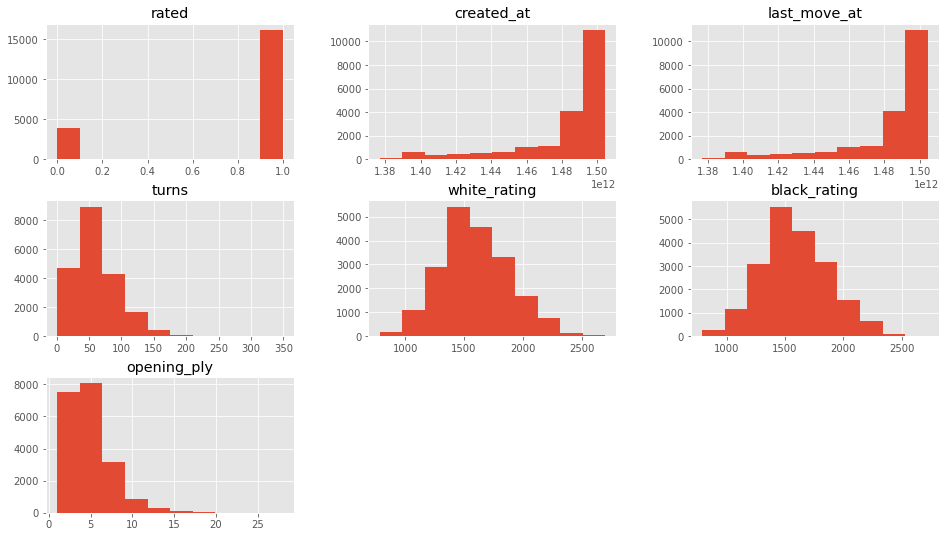

In [5]:
dataframe.drop(['winner'],1).hist()
plt.show()

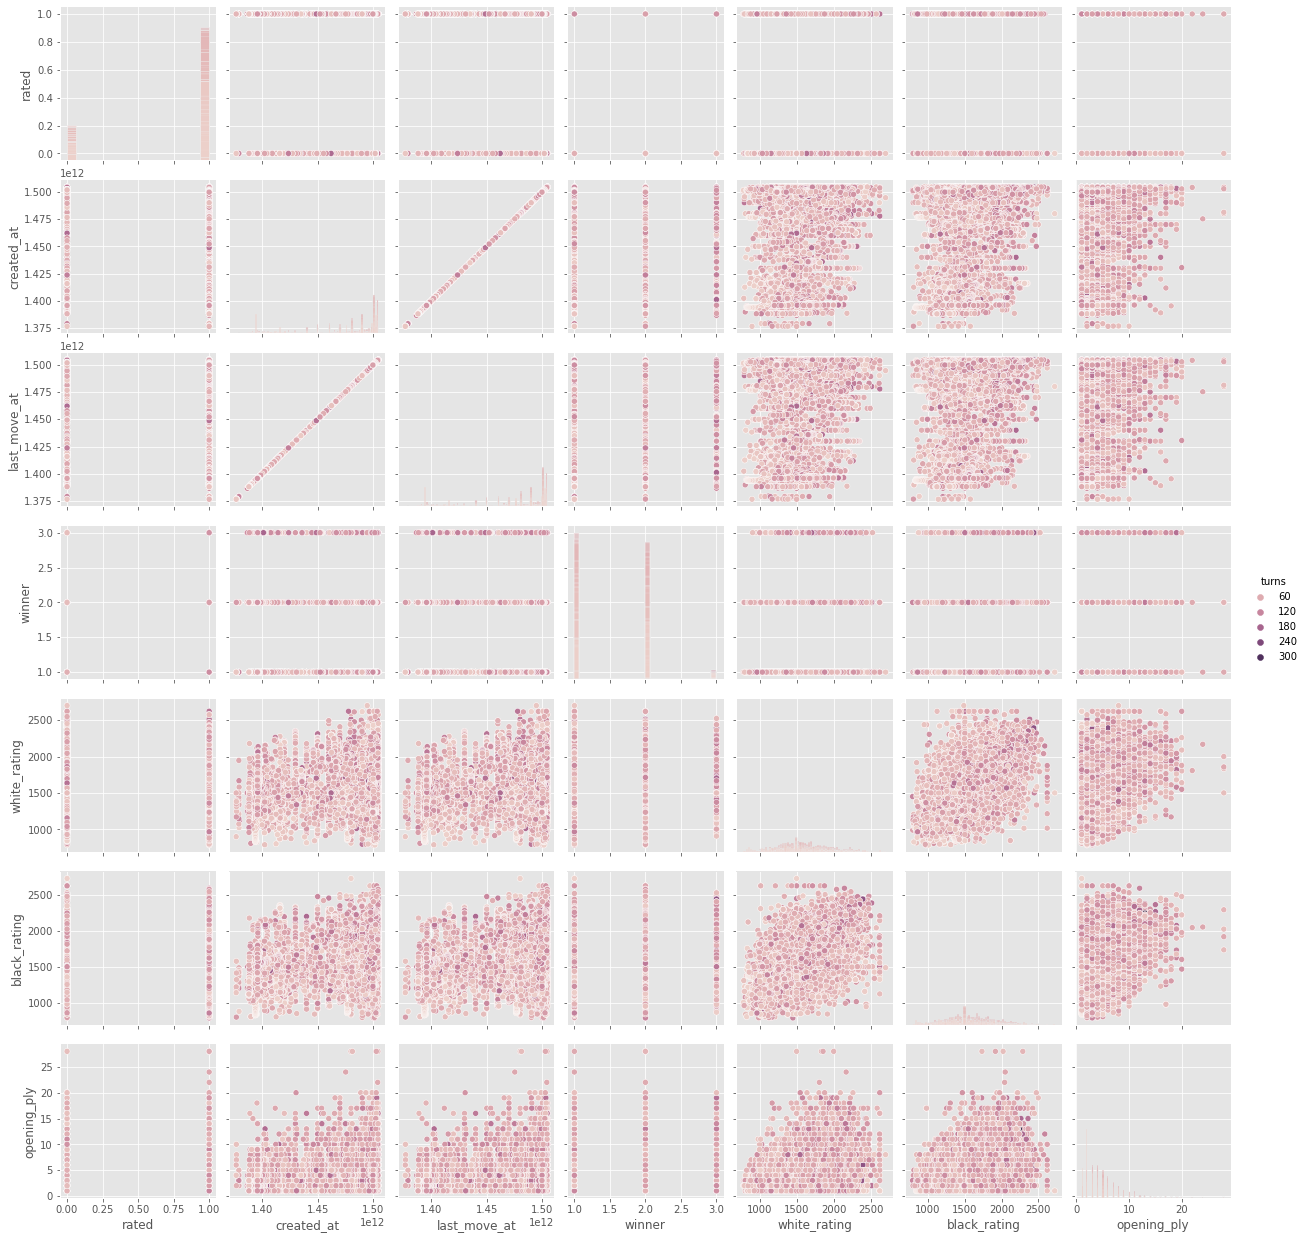

In [17]:
sb.pairplot(dataframe, hue="turns", diag_kind="hist");


In [7]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["black_rating","white_rating","turns"]])
y = np.array(dataframe['winner'])
X.shape

(20058, 3)

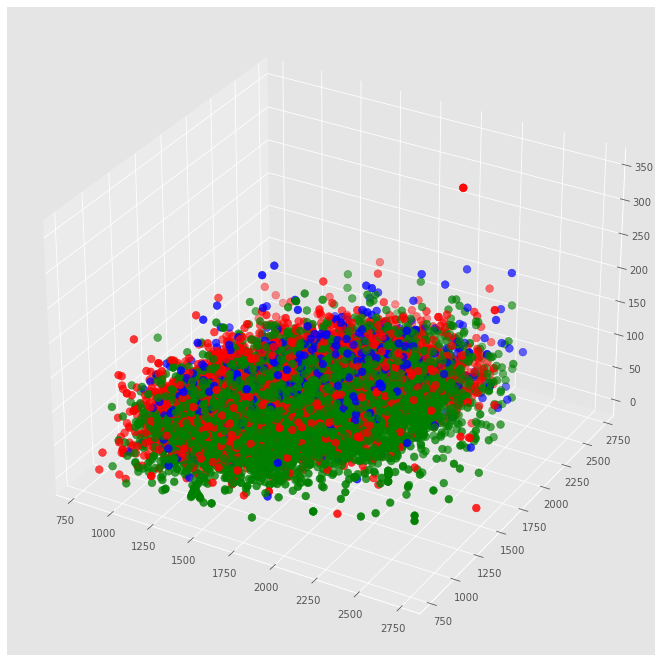

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown',"purple"]
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en i
asignar=[]
for row in y:
 asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60);

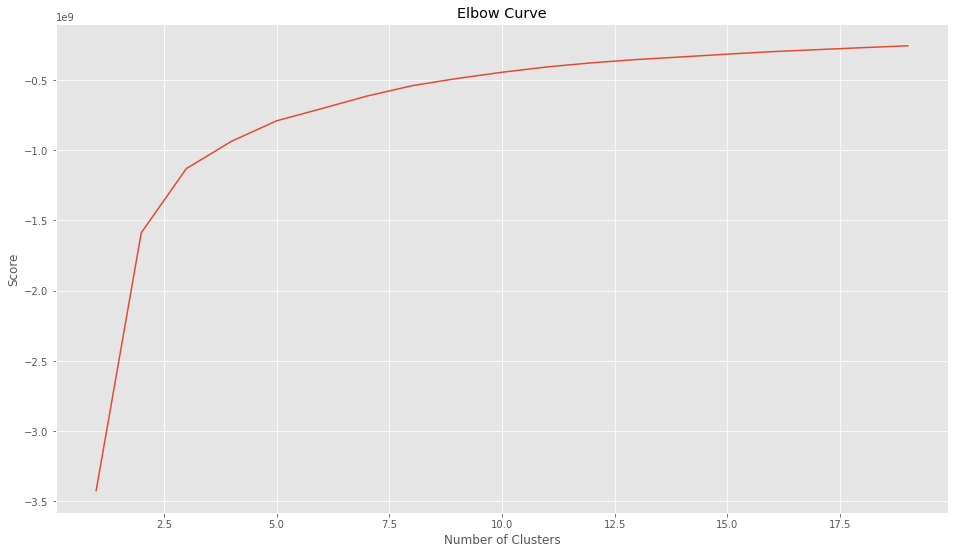

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[1701.85595921 1720.24410453   65.88017846]
 [1278.9045911  1413.33177905   54.76936872]
 [1378.96362229 1780.9876161    54.19814241]
 [1648.10545455 2196.51636364   54.60545455]
 [1531.95976879 1518.37734104   62.17919075]
 [1513.82233796 1241.3900463    53.48668981]
 [1959.153      1480.101        57.607     ]
 [2153.32191781 2124.48030822   70.02482877]
 [1146.97745773 1145.38572323   50.73324984]
 [1912.27184466 1891.1197411    69.40695793]]


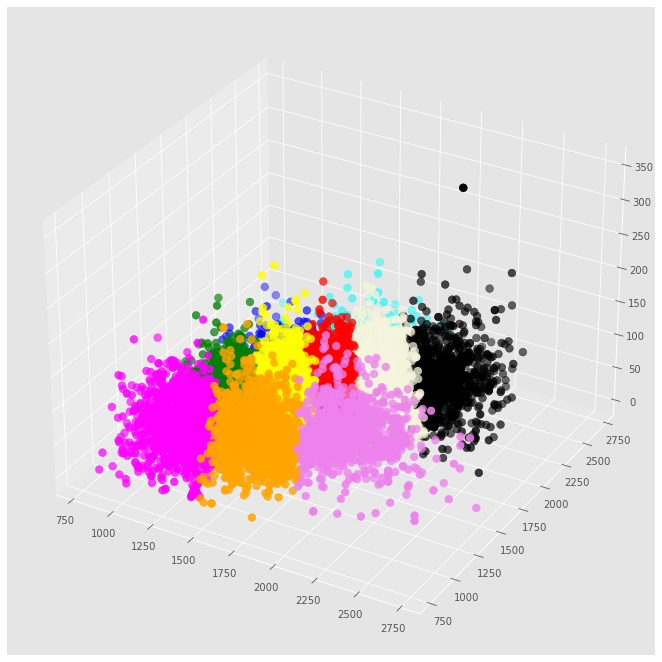

In [30]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', "orange", "violet", "black", "magenta", "beige"]
asignar=[]
for row in labels:
 asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

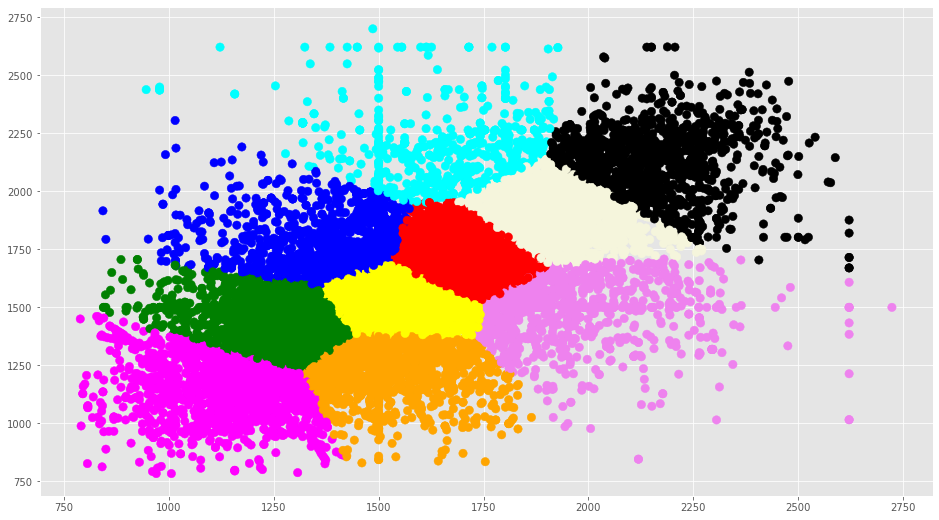

In [31]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['black_rating'].values
f2 = dataframe['white_rating'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

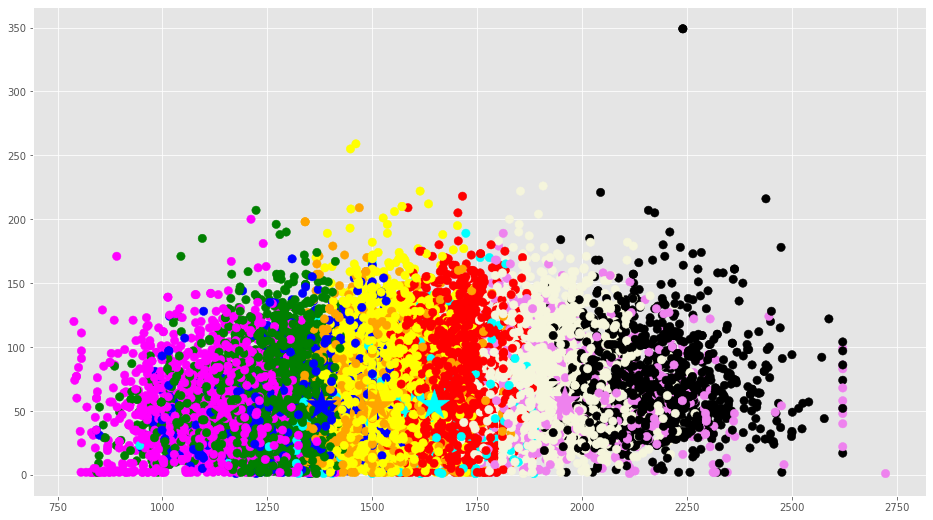

In [32]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['black_rating'].values
f2 = dataframe['turns'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000);
plt.show()



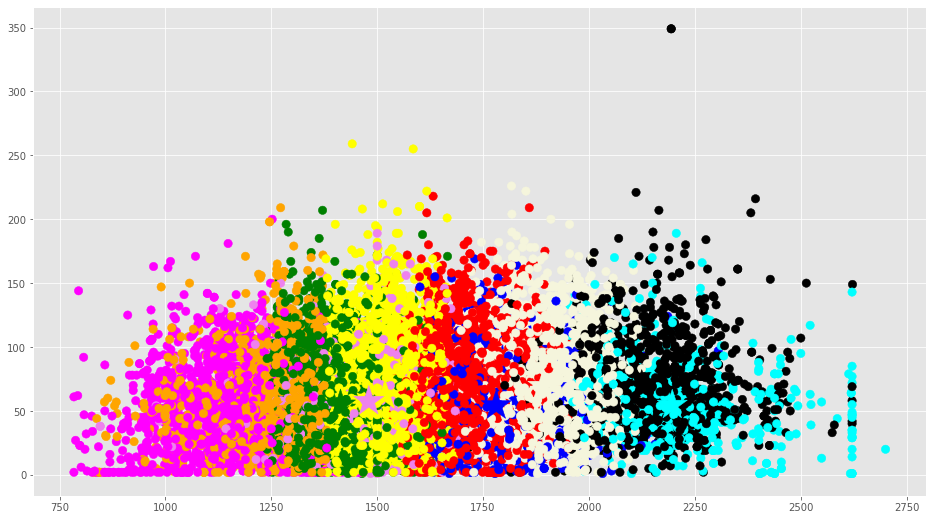

In [33]:
f1 = dataframe['white_rating'].values
f2 = dataframe['turns'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [35]:
print (classification_report(y, labels));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.63      0.18      0.28     10001
           2       0.18      0.03      0.04      9107
           3       0.05      0.03      0.03       950
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     20058
   macro avg       0.09      0.02      0.04     20058
weighted avg       0.40      0.10      0.16     20058



In [ ]:
¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- Los 10 centros son representativos de los datos ya que nos permite 
ver en el plano dode se encuentra nuestras muestras más significativas.
En el caso de este estudio se ve claramente que los centros son representativos
de la información.

¿Cómo obtuviste el valor de k a usar?
- Al tener poco mas de 20,000 datos, tuvimos que utilizar 10 cómo nuestra k
para poder iferenciar de manera correcta nuestros conjuntos de datos. Se podría
utilizar más centros,sin embargo para el analísis hecho con estos es suficiente.

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- Al utilizar más centros la información se subdivide por lo que el centro tiene
menos puntos y es más exacto y representativo.


¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano 
a otros?
- Al tener la agrupación de la información en una area "reducida",
los centros están cerca unos de otros, esto no es importancia  
ya que cada centro es significativo de su región.



¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis 
de cajas y bigotes?
-Lo que se podría observar es que los centros se verian muy juntos entre si 
en los analísis de caja y bigotes.


¿Qué puedes decir de los datos basándose en los centros?
- Se denota que la agrupación de la información está en una sola región 
del plano y del espacio,donde todos nuestros puntos están en el 
primer cuadrante siendo todos positivos
 
